In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv('/content/drive/MyDrive/LoanApprovalPrediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# getting the number of columns of object datatype
obj = (data.dtypes == 'object')

print('Categorical values:', len(list(obj[obj].index)))

Categorical values: 7


In [5]:
data.drop(columns=['Loan_ID'],inplace=True)

In [6]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])


In [7]:
""" To find the number of columns with
 datatype==object"""
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


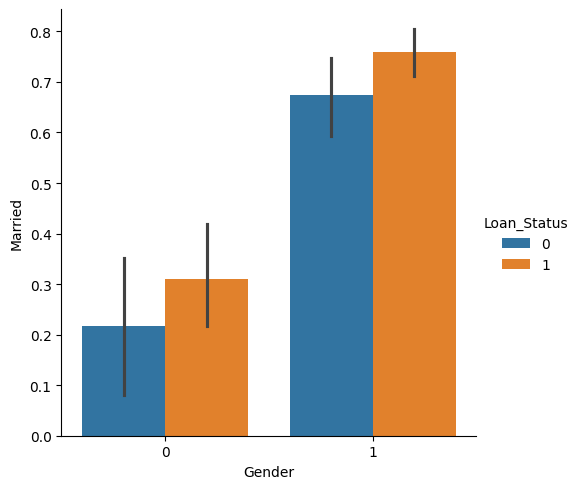

In [8]:
sns.catplot(x="Gender", y="Married",
			hue="Loan_Status",
			kind="bar",
			data=data)


In [9]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())
data.isna().sum

<bound method DataFrame.sum of      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     False    False       False      False          False            False   
1     False    False       False      False          False            False   
2     False    False       False      False          False            False   
3     False    False       False      False          False            False   
4     False    False       False      False          False            False   
..      ...      ...         ...        ...            ...              ...   
593   False    False       False      False          False            False   
594   False    False       False      False          False            False   
595   False    False       False      False          False            False   
596   False    False       False      False          False            False   
597   False    False       False      False          False            False   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                False       False             False           False   
1                False       False             False           False   
2                False       False             False           False   
3                False       False             False           False   
4                False       False             False           False   
..                 ...         ...               ...             ...   
593              False       False             False           False   
594              False       False             False           False   
595              False       False             False           False   
596              False       False             False           False   
597              False       False             False           False   

     Property_Area  Loan_Status  
0            False        False  
1            False        False  
2            False        False  
3            False        False  
4            False        False  
..             ...          ...  
593          False        False  
594          False        False  
595          False        False  
596          False        False  
597          False        False  

[598 rows x 12 columns]>

In [10]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['Loan_Status'],axis=1)
y = data['Loan_Status']

x.shape,y.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [12]:
classifier= {
    'KNN' : KNeighborsClassifier(n_neighbors=3),
    'RandomForestClassifier' : RandomForestClassifier(n_estimators=100),
    'DecisionTree' : DecisionTreeClassifier(),
    'LogisticRegression' : LogisticRegression()
}

In [13]:
for name,clf in classifier.items():
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print(f"Accuracy of {name} is: {100 * accuracy_score(y_test, y_pred)}")
  print(f"Precision of {name} is: {100 * precision_score(y_test, y_pred)}")
  print(f"Recall of {name} is: {100 * recall_score(y_test, y_pred)}")
  print(f"F1-score of {name} is: {100 * f1_score(y_test, y_pred)}")
  print("-" * 30)

Accuracy of KNN is: 65.0
Precision of KNN is: 72.6775956284153
Recall of KNN is: 79.64071856287424
F1-score of KNN is: 76.0
------------------------------
Accuracy of RandomForestClassifier is: 80.0
Precision of RandomForestClassifier is: 80.82901554404145
Recall of RandomForestClassifier is: 93.41317365269461
F1-score of RandomForestClassifier is: 86.66666666666667
------------------------------
Accuracy of DecisionTree is: 77.91666666666667
Precision of DecisionTree is: 86.07594936708861
Recall of DecisionTree is: 81.437125748503
F1-score of DecisionTree is: 83.6923076923077
------------------------------
Accuracy of LogisticRegression is: 78.75
Precision of LogisticRegression is: 78.71287128712872
Recall of LogisticRegression is: 95.20958083832335
F1-score of LogisticRegression is: 86.1788617886179
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

In [15]:
for estimator in [RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier]:
  estimator = estimator()
  bagging_model = BaggingClassifier(estimator=estimator, n_estimators=10,random_state =42)
  classifier = bagging_model.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy of",estimator.__class__.__name__,"is",100*accuracy)

Accuracy of RandomForestClassifier is 78.33333333333333
Accuracy of DecisionTreeClassifier is 72.91666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of LogisticRegression is 78.33333333333333
Accuracy of KNeighborsClassifier is 65.41666666666667
